# Project Name: Multiclass Fish Image Classification

##### **Project Type**    - Supervised / Classification
##### **Contribution**    - Individual
##### **Member       - Puneeth Sai Satvik**

### Project Summary

Aim: To input the image of a fish and classify it into one of the 11 categories.

The dataset which is provided has three main folders which are test, train and val serving different purposes.

#### Data preprocessing and augmentation

In this stage, the paths for each of the folders are specified with batch size and their dimensions. The train data is rescaled, rotated and flipped to make the model learn better, whereas the test and val data are only resized (224 x 224) using the image generator function from Keras. After this, generators are created which will be used to train and test the model. A small block of code is used to create a JSON file consisting of class labels that are used later.

#### Model Training

For model training, a total of six models were used which are

* Custom CNN Model: A CNN model built from scratch using Sequential function consisting of four layers and 20 epochs.
* VGG16: A pre-trained which is fine-tuned and modified by replacing output layers and retraining last 4 layers with 5 epochs size.
* ResNet50: A pre-trained which is fine-tuned and modified by replacing output layers and retraining last 20 layers with 10 epochs size.
* MobileNet: A pre-trained which is fine-tuned and modified by replacing output layers and retraining last 30 layers with 10 epochs size.
* InceptionV3: A pre-trained which is fine-tuned and modified by replacing output layers and retraining last 50 layers with 10 epochs size.
* EfficientNetB0: A pre-trained which is fine-tuned and modified by replacing output layers and retraining last 30 layers with 10 epochs size.

Each model, after being trained, is exported as .h5 and .keras format to be used later.

#### Model Evaluation and Selection

For model evaluation metrics such as Accuracy, Precision, F1 Score were used. In addition to this, confusion matrices for each model were plotted and analyzed. The Accuracy for each model are as follows

Custom CNN Model: 0.9448
VGG16: 0.9649
ResNet50: 0.7330
MobileNet: 0.9940
InceptionV3: 0.9940
EfficientNetB0: 0.1632

Note: A point to be noted that all the models performed poorly recognizing animal fish bass due to insufficient images causing underfitting

After looking at all the factors considering model complexity, execution times, accuracy and confidence scores on some images, MobileNet seemed like an appropriate model.

#### StreamLit Application

Finally, a streamlit application with the appropriate UI is built that allows the users to upload an image and the fine-tuned MobileNet model predicts top 3 fish's names with the confidence scores.


### GitHub Link

https://github.com/puneethsai001/Fish-Image-Classification

### Dataset Link

https://drive.google.com/drive/folders/1iKdOs4slf3XvNWkeSfsszhPRggfJ2qEd?usp=sharing

### Data Preprocessing and Augmentation

In [1]:
# Essential Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/Users/puneethsai/PyCharmMiscProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Define dataset paths
train_dir = 'Dataset/data/train'
val_dir = 'Dataset/data/val'
test_dir = 'Dataset/data/test'

In [3]:
# Define standard dimensions and batch size

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [4]:
# Rescaling and Augmenting the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Rescaling the val and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [5]:
# Saving the class index as json file
import os
import json

class_names = sorted(os.listdir(train_dir))
class_names = [name for name in class_names if os.path.isdir(os.path.join(train_dir, name))]
labels = {i: name for i, name in enumerate(class_names)}

with open('class_labels.json', 'w') as f:
    json.dump(labels, f)

### Model Training

#### CNN Model From Scratch

In [6]:
# Essential Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [7]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

/Users/puneethsai/PyCharmMiscProject/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

/Users/puneethsai/PyCharmMiscProject/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.3503 - loss: 2.2120 - val_accuracy: 0.0962 - val_loss: 10.1676
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 191s 980ms/step - accuracy: 0.5672 - loss: 1.2864 - val_accuracy: 0.2885 - val_loss: 5.8579
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.6267 - loss: 1.0936 - val_accuracy: 0.7005 - val_loss: 0.9440
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 195s 996ms/step - accuracy: 0.6821 - loss: 0.9272 - val_accuracy: 0.8599 - val_loss: 0.4996
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 191s 981ms/step - accuracy: 0.7129 - loss: 0.8490 - val_accuracy: 0.9112 - val_loss: 0.3797
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 195s 998ms/step - accuracy: 0.7618 - loss: 0.7282 - val_accuracy: 0.8791 - val_loss: 0.4199
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 192s 984ms/step - accuracy: 0.7902 - loss: 0.6259 - val_accuracy: 0.9103 - val_loss: 0.3193
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.8051 - loss: 0

In [10]:
# Saving the model as h5
model.save('Custom CNN/custom_cnn_model.h5')

In [11]:
# Saving the model as keras
model.save('Custom CNN/custom_cnn_model.keras')

#### Model 1: VGG16

In [12]:
# Essential Imports
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
# Load pre-trained VGG16

VGG_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [14]:
# Modifying the output layer

x = VGG_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_vgg = Model(inputs=VGG_base_model.input, outputs=output)

In [15]:
# Set the whole model as trainable
VGG_base_model.trainable = True

# Freeze all layers except the last 4
for layer in VGG_base_model.layers[:-4]:
    layer.trainable = False

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [16]:
# Train the fine tuned VGG16 model

history_vgg_finetune = model_vgg.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 830s 4s/step - accuracy: 0.2290 - loss: 2.2628 - val_accuracy: 0.7189 - val_loss: 1.2317
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 785s 4s/step - accuracy: 0.5803 - loss: 1.2497 - val_accuracy: 0.8709 - val_loss: 0.6489
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 795s 4s/step - accuracy: 0.7489 - loss: 0.7909 - val_accuracy: 0.9167 - val_loss: 0.4176
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 840s 4s/step - accuracy: 0.8184 - loss: 0.5845 - val_accuracy: 0.9313 - val_loss: 0.2873
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 865s 4s/step - accuracy: 0.8684 - loss: 0.4490 - val_accuracy: 0.9570 - val_loss: 0.2296


In [17]:
# Saving the model as h5
model_vgg.save('VGG16/vgg_finetuned_model.h5')

In [18]:
# Saving the model as keras
model_vgg.save('VGG16/vgg_finetuned_model.keras')

#### Model 2: ResNet50

In [19]:
# Essentia Imports
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
# Load pre-trained ResNet50

resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [21]:
# Modifying the output layer

x = resnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_resnet = Model(inputs=resnet_base_model.input, outputs=output)

In [22]:
# Set the whole model as trainable
resnet_base_model.trainable = True

# Freeze all layers except the last 20
for layer in resnet_base_model.layers[:-20]:
    layer.trainable = False

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [23]:
# Train the fine-tuned ResNet50 model

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.1691 - loss: 2.3957 - val_accuracy: 0.0897 - val_loss: 2.6664
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.3625 - loss: 1.8683 - val_accuracy: 0.1978 - val_loss: 2.1146
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.4488 - loss: 1.6299 - val_accuracy: 0.5293 - val_loss: 1.4339
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.5165 - loss: 1.4246 - val_accuracy: 0.6456 - val_loss: 1.1144
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.5621 - loss: 1.3054 - val_accuracy: 0.7134 - val_loss: 1.0044
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.5950 - loss: 1.2129 - val_accuracy: 0.6951 - val_loss: 0.9632
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.6189 - loss: 1.1530 - val_accuracy: 0.7042 - val_loss: 0.9121
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.6509 - loss: 1.0733 - val_accu

In [24]:
# Saving the model as h5
model_resnet.save('ResNet50/resnet_finetuned_model.h5')

In [25]:
# Saving the model as keras
model_resnet.save('ResNet50/resnet_finetuned_model.keras')

#### Model 3: MobileNet

In [26]:
# Essentia Imports
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [27]:
# Load pre-trained MobileNet

mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [28]:
# Modifying the output layer

x = mobilenet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=mobilenet_base_model.input, outputs=output)

In [29]:
# Set the whole model as trainable
mobilenet_base_model.trainable = True

# Freeze all layers except the last 30
for layer in mobilenet_base_model.layers[:-30]:
    layer.trainable = False

In [30]:
# Compile the model
model_mobilenet.compile(optimizer=Adam(learning_rate=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [31]:
# Train the fine-tuned MobileNet model

history_mobilenet = model_mobilenet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 498ms/step - accuracy: 0.1710 - loss: 2.7345 - val_accuracy: 0.6896 - val_loss: 1.2820
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 501ms/step - accuracy: 0.5304 - loss: 1.4368 - val_accuracy: 0.9029 - val_loss: 0.6811
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 496ms/step - accuracy: 0.7209 - loss: 0.9369 - val_accuracy: 0.9469 - val_loss: 0.4021
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 98s 503ms/step - accuracy: 0.8172 - loss: 0.6440 - val_accuracy: 0.9734 - val_loss: 0.2607
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 510ms/step - accuracy: 0.8815 - loss: 0.4708 - val_accuracy: 0.9789 - val_loss: 0.1819
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 511ms/step - accuracy: 0.9076 - loss: 0.3687 - val_accuracy: 0.9853 - val_loss: 0.1309
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 517ms/step - accuracy: 0.9236 - loss: 0.2884 - val_accuracy: 0.9881 - val_loss: 0.0999
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 519ms/step - accuracy: 0.9402 - los

In [32]:
# Saving the model as h5
model_mobilenet.save('MobileNet/mobilenet_finetuned_model.h5')

In [33]:
# Saving the model as keras
model_mobilenet.save('MobileNet/mobilenet_finetuned_model.keras')

#### Model 4: InceptionV3

In [34]:
# Essential Imports
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [35]:
# Load pre-trained InceptionV3

inception_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [36]:
# Modify the output layer

x = inception_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_inception = Model(inputs=inception_base_model.input, outputs=output)

In [37]:
# Set the whole model as trainable
inception_base_model.trainable = True

# Freeze all layers except the last 50
for layer in inception_base_model.layers[:-50]:
    layer.trainable = False

In [38]:
# Compile the model
model_inception.compile(optimizer=Adam(learning_rate=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [39]:
# Train the fine-tuned InceptionV3

history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 170s 857ms/step - accuracy: 0.2735 - loss: 2.1489 - val_accuracy: 0.8654 - val_loss: 0.9164
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 167s 854ms/step - accuracy: 0.7613 - loss: 0.9929 - val_accuracy: 0.9414 - val_loss: 0.3989
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 167s 854ms/step - accuracy: 0.8734 - loss: 0.5521 - val_accuracy: 0.9579 - val_loss: 0.2305
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 171s 875ms/step - accuracy: 0.9089 - loss: 0.3692 - val_accuracy: 0.9698 - val_loss: 0.1595
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 170s 872ms/step - accuracy: 0.9345 - loss: 0.2658 - val_accuracy: 0.9762 - val_loss: 0.1228
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 170s 873ms/step - accuracy: 0.9543 - loss: 0.1905 - val_accuracy: 0.9808 - val_loss: 0.0931
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 172s 881ms/step - accuracy: 0.9601 - loss: 0.1803 - val_accuracy: 0.9863 - val_loss: 0.0771
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 173s 885ms/step - accuracy: 0.9649 -

In [40]:
# Saving the model as h5
model_inception.save('InceptionV3/inception_finetuned_model.h5')

In [41]:
# Saving the model as keras
model_inception.save('InceptionV3/inception_finetuned_model.keras')

#### Model 5: EfficientNetB0

In [42]:
# Essential Imports
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [43]:
# Load pre-trained EfficientNetB0

efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [44]:
# Modify output layer

x = efficientnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model_efficientnet = Model(inputs=efficientnet_base_model.input, outputs=output)

In [45]:
# Set the whole model as trainable
efficientnet_base_model.trainable = True

# Freeze all layers except the top 20
for layer in efficientnet_base_model.layers[:-20]:
    layer.trainable = False

In [46]:
# Compile the model
model_efficientnet.compile(optimizer=Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [47]:
# Train the fine-tuned EfficientNetB0


history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 556ms/step - accuracy: 0.1180 - loss: 2.4114 - val_accuracy: 0.1035 - val_loss: 2.4067
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 575ms/step - accuracy: 0.1484 - loss: 2.3613 - val_accuracy: 0.1035 - val_loss: 2.3578
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 543ms/step - accuracy: 0.1594 - loss: 2.3482 - val_accuracy: 0.1712 - val_loss: 2.3321
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 529ms/step - accuracy: 0.1601 - loss: 2.3395 - val_accuracy: 0.1712 - val_loss: 2.3253
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 541ms/step - accuracy: 0.1635 - loss: 2.3344 - val_accuracy: 0.1712 - val_loss: 2.3233
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 532ms/step - accuracy: 0.1650 - loss: 2.3342 - val_accuracy: 0.1712 - val_loss: 2.3209
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 105s 540ms/step - accuracy: 0.1542 - loss: 2.3384 - val_accuracy: 0.1712 - val_loss: 2.3194
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 541ms/step - accuracy: 0.1663 -

In [48]:
# Saving the model as h5
model_inception.save('EfficientNetB0/efficientnet_finetuned_model.h5')

In [49]:
# Saving the model as keras
model_inception.save('EfficientNetB0/efficientnet_finetuned_model.keras')

### Model Evaluation

##### Accuracy

In [ ]:
# Computing CNNs Accuracy
cnn_loss, cnn_accuracy = model.evaluate(test_generator)
print(f"Custom CNN Accuracy: {cnn_accuracy:.4f}")

# Computing fine-tuned VGG16s Accuracy
vgg_loss, vgg_accuracy = model_vgg.evaluate(test_generator)
print(f"VGG16 Accuracy: {vgg_accuracy:.4f}")

# Computing fine-tuned ResNet50s Accuracy
resnet_loss, resnet_accuracy = model_resnet.evaluate(test_generator)
print(f"ResNet50 Accuracy: {resnet_accuracy:.4f}")

# Computing fine-tuned MobileNets Accuracy
mobilenet_loss, mobilenet_accuracy = model_mobilenet.evaluate(test_generator)
print(f"MobileNet Accuracy: {mobilenet_accuracy:.4f}")

# Computing fine-tuned InceptionV3 Accuracy
inception_loss, inception_accuracy = model_inception.evaluate(test_generator)
print(f"InceptionV3 Accuracy: {inception_accuracy:.4f}")

# Computing fine-tuned EfficientNetb0 Accuracy
efficient_loss, efficient_accuracy = model_efficientnet.evaluate(test_generator)
print(f"EfficientNetB0 Accuracy: {efficient_accuracy:.4f}")

##### Precision, Recall, and F1-score

In [50]:
# Essential Imports
from sklearn.metrics import classification_report
import numpy as np

In [52]:
# Custom CNN
test_generator.reset()
cnn_prob = model.predict(test_generator, verbose=0)
cnn_pred = np.argmax(cnn_prob, axis=1)
print("=== Custom CNN ===")
print(classification_report(test_generator.classes, cnn_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== Custom CNN ===
                                  precision    recall  f1-score   support

                     animal fish     0.9754    0.9904    0.9828       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9637    0.9799    0.9717       298
   fish sea_food gilt_head_bream     0.9781    0.7311    0.8368       305
   fish sea_food hourse_mackerel     0.9286    1.0000    0.9630       286
        fish sea_food red_mullet     1.0000    1.0000    1.0000       291
     fish sea_food red_sea_bream     0.6959    0.9890    0.8169       273
          fish sea_food sea_bass     0.9858    0.8471    0.9112       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     1.0000    0.9659    0.9826       293
             fish sea_food trout     0.9930    0.9760    0.9845       292

                        accuracy                         0.9448      3187
                 

In [53]:
# VGG16
test_generator.reset()
vgg_prob = model_vgg.predict(test_generator, verbose=0)
vgg_pred = np.argmax(vgg_prob, axis=1)
print("=== VGG16 ===")
print(classification_report(test_generator.classes, vgg_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== VGG16 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9773    0.9923    0.9847       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.8892    0.9966    0.9399       298
   fish sea_food gilt_head_bream     0.9385    1.0000    0.9683       305
   fish sea_food hourse_mackerel     0.9895    0.9860    0.9877       286
        fish sea_food red_mullet     0.9679    0.9313    0.9492       291
     fish sea_food red_sea_bream     0.9925    0.9744    0.9834       273
          fish sea_food sea_bass     1.0000    0.9358    0.9668       327
            fish sea_food shrimp     0.9633    1.0000    0.9813       289
fish sea_food striped_red_mullet     0.9382    0.8805    0.9085       293
             fish sea_food trout     0.9965    0.9760    0.9862       292

                        accuracy                         0.9649      3187
                      

In [54]:
# ResNet50
test_generator.reset()
resnet_prob = model_resnet.predict(test_generator, verbose=0)
resnet_pred = np.argmax(resnet_prob, axis=1)
print("=== ResNet50 ===")
print(classification_report(test_generator.classes, resnet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== ResNet50 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9749    0.8962    0.9339       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.7545    0.8456    0.7975       298
   fish sea_food gilt_head_bream     0.7011    0.6230    0.6597       305
   fish sea_food hourse_mackerel     0.6150    0.8042    0.6970       286
        fish sea_food red_mullet     0.7737    0.6460    0.7041       291
     fish sea_food red_sea_bream     0.4389    0.9744    0.6052       273
          fish sea_food sea_bass     0.7148    0.5749    0.6373       327
            fish sea_food shrimp     0.8741    0.8893    0.8816       289
fish sea_food striped_red_mullet     0.9322    0.1877    0.3125       293
             fish sea_food trout     0.9208    0.8356    0.8761       292

                        accuracy                         0.7330      3187
                   

In [55]:
# MobileNet
test_generator.reset()
mobilenet_prob = model_mobilenet.predict(test_generator, verbose=0)
mobilenet_pred = np.argmax(mobilenet_prob, axis=1)
print("=== MobileNet ===")
print(classification_report(test_generator.classes, mobilenet_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== MobileNet ===
                                  precision    recall  f1-score   support

                     animal fish     0.9756    1.0000    0.9877       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.9967    1.0000    0.9983       298
   fish sea_food gilt_head_bream     0.9967    1.0000    0.9984       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     0.9965    0.9897    0.9931       291
     fish sea_food red_sea_bream     1.0000    0.9963    0.9982       273
          fish sea_food sea_bass     1.0000    1.0000    1.0000       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9898    0.9932    0.9915       293
             fish sea_food trout     1.0000    1.0000    1.0000       292

                        accuracy                         0.9940      3187
                  

In [56]:
# InceptionV3
test_generator.reset()
inception_prob = model_inception.predict(test_generator, verbose=0)
inception_pred = np.argmax(inception_prob, axis=1)
print("=== InceptionV3 ===")
print(classification_report(test_generator.classes, inception_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== InceptionV3 ===
                                  precision    recall  f1-score   support

                     animal fish     0.9756    0.9981    0.9867       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     1.0000    1.0000    1.0000       298
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000       305
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000       286
        fish sea_food red_mullet     0.9965    0.9897    0.9931       291
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       273
          fish sea_food sea_bass     0.9970    1.0000    0.9985       327
            fish sea_food shrimp     1.0000    1.0000    1.0000       289
fish sea_food striped_red_mullet     0.9864    0.9932    0.9898       293
             fish sea_food trout     1.0000    1.0000    1.0000       292

                        accuracy                         0.9940      3187
                

In [65]:
# EfficientNetB0
test_generator.reset()
efficient_prob = model_efficientnet.predict(test_generator, verbose=0)
efficient_pred = np.argmax(efficient_prob, axis=1)
print("=== EfficientNetB0 ===")
print(classification_report(test_generator.classes, efficient_pred, target_names=test_generator.class_indices.keys(), zero_division=0, digits=4))

=== EfficientNetB0 ===
                                  precision    recall  f1-score   support

                     animal fish     0.1632    1.0000    0.2806       520
                animal fish bass     0.0000    0.0000    0.0000        13
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       298
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000       305
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000       286
        fish sea_food red_mullet     0.0000    0.0000    0.0000       291
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       273
          fish sea_food sea_bass     0.0000    0.0000    0.0000       327
            fish sea_food shrimp     0.0000    0.0000    0.0000       289
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       293
             fish sea_food trout     0.0000    0.0000    0.0000       292

                        accuracy                         0.1632      3187
             

##### Confusion Matrix

In [58]:
# Essential Imports
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Function to plot the confusion matrix

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()


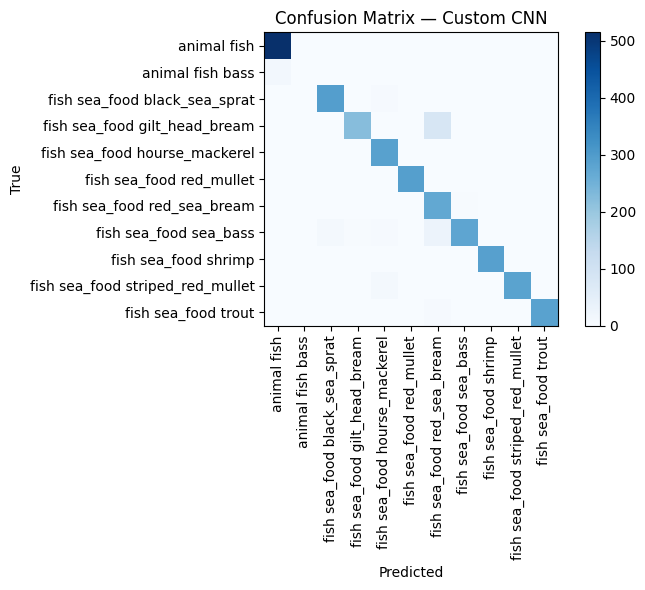

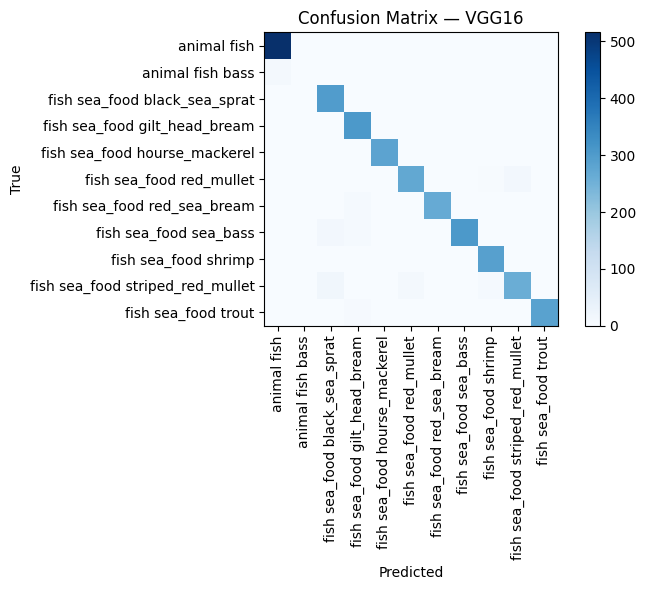

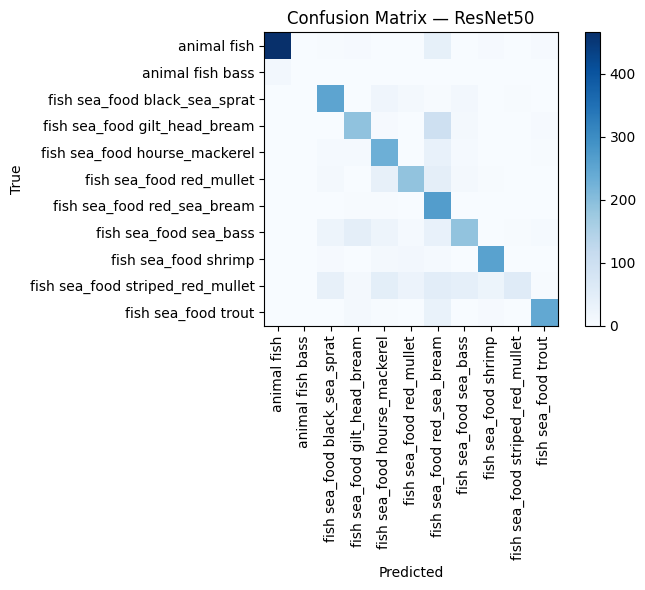

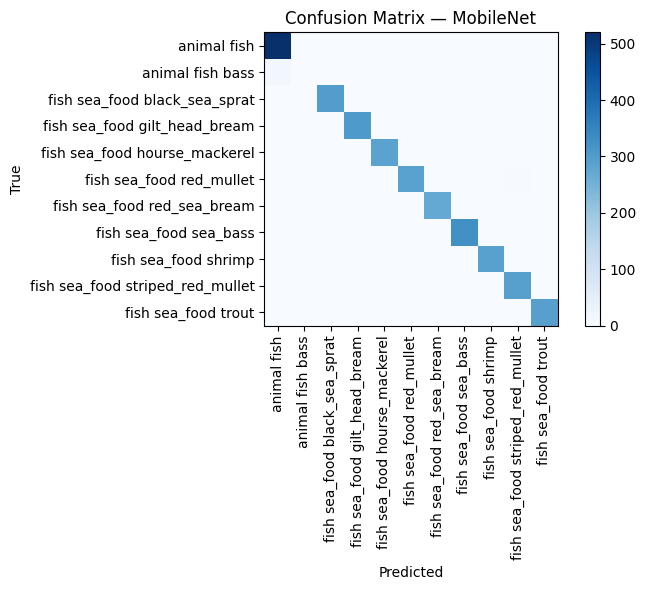

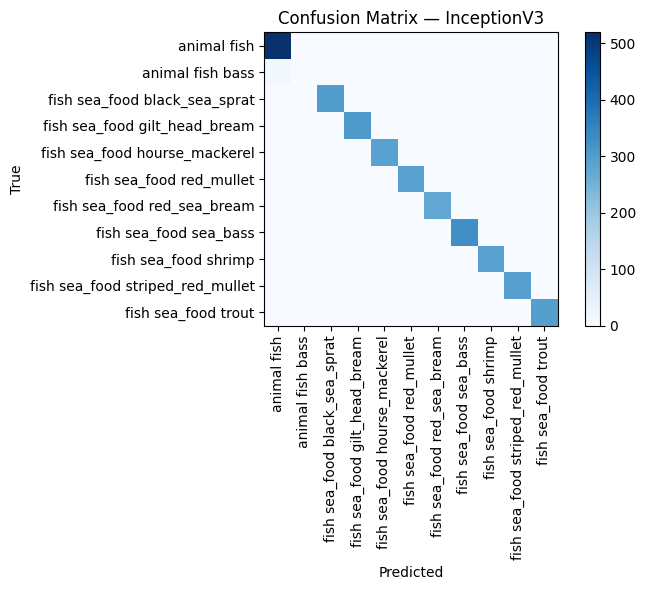

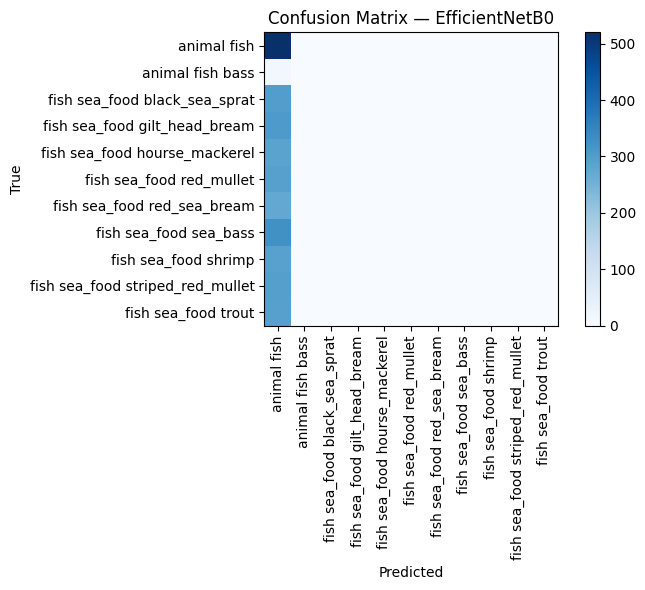

In [60]:
class_names = list(test_generator.class_indices.keys())
y_true = test_generator.classes

# Custom CNN
plot_confusion_matrix(y_true, cnn_pred, class_names, "Confusion Matrix — Custom CNN")

# VGG16
plot_confusion_matrix(y_true, vgg_pred, class_names, "Confusion Matrix — VGG16")

# ResNet50
plot_confusion_matrix(y_true, resnet_pred, class_names, "Confusion Matrix — ResNet50")

# MobileNet
plot_confusion_matrix(y_true, mobilenet_pred, class_names, "Confusion Matrix — MobileNet")

# InceptionV3
plot_confusion_matrix(y_true, inception_pred, class_names, "Confusion Matrix — InceptionV3")

# EfficientNetB0
plot_confusion_matrix(y_true, efficient_pred, class_names, "Confusion Matrix — EfficientNetB0")


##### Visualize training history (accuracy and loss) for each model.

In [61]:
# Essential Imports
import matplotlib.pyplot as plt

In [62]:

histories = [
    ("Custom CNN",             history),                 # e.g., from model.fit(...)
    ("VGG16 (fine-tuned)",     history_vgg_finetune),
    ("ResNet50 (fine-tuned)",  history_resnet),
    ("MobileNet (fine-tuned)", history_mobilenet),
    ("InceptionV3 (fine-tuned)", history_inception),
    ("EfficientNetB0 (fine-tuned)", history_efficientnet),
]

def _get(hist, k1, k2):
    return hist.history.get(k1) or hist.history.get(k2)


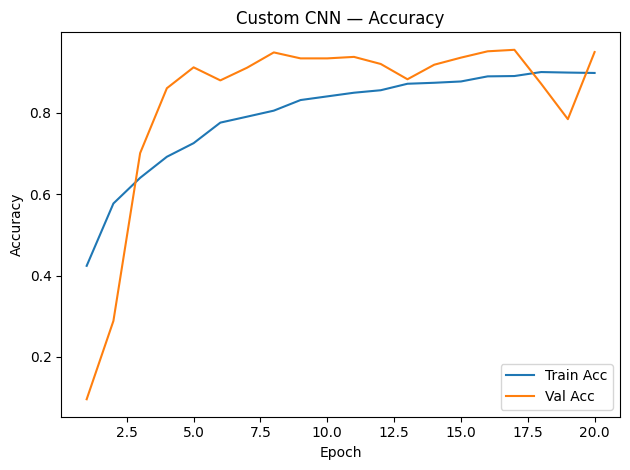

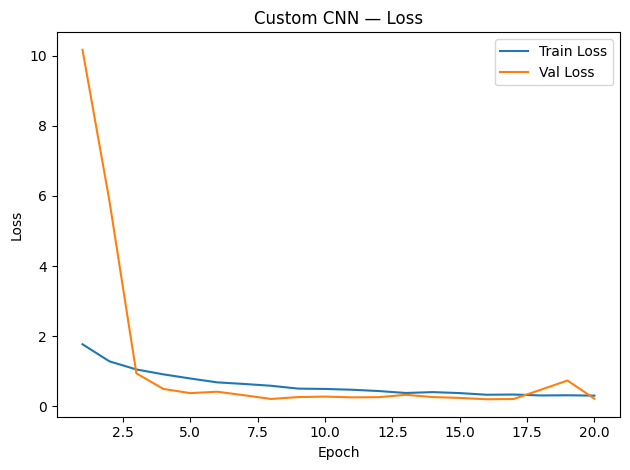

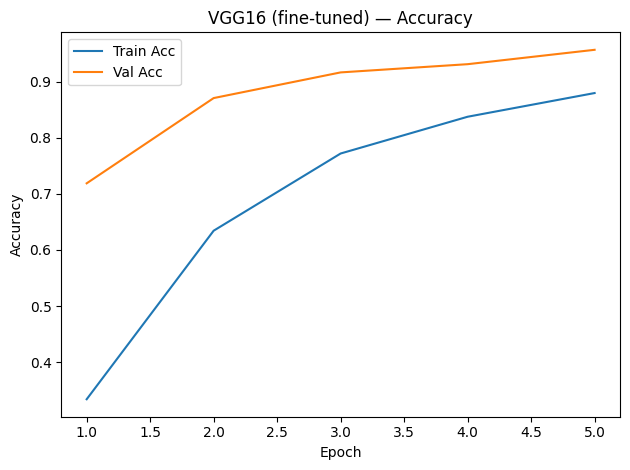

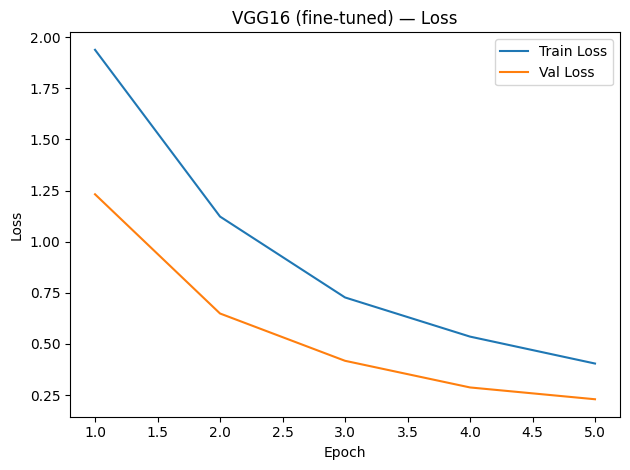

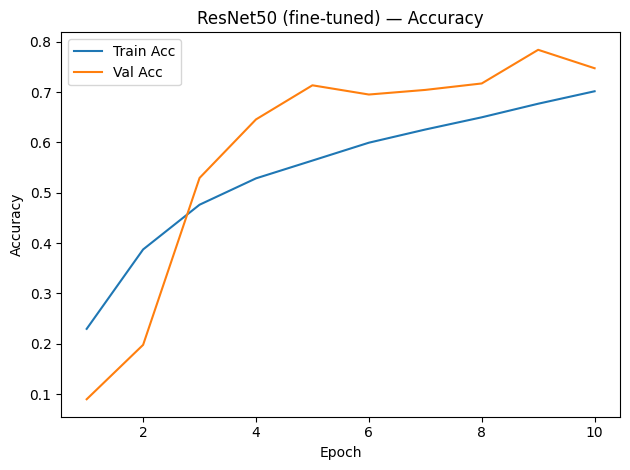

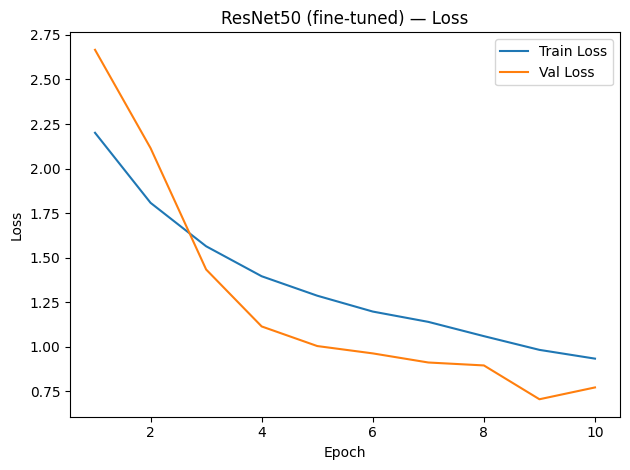

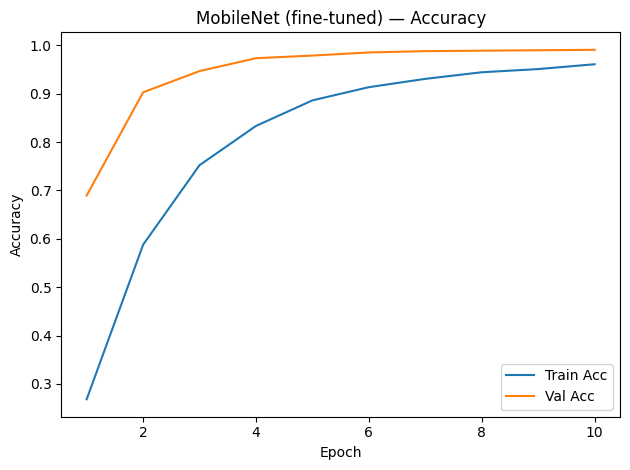

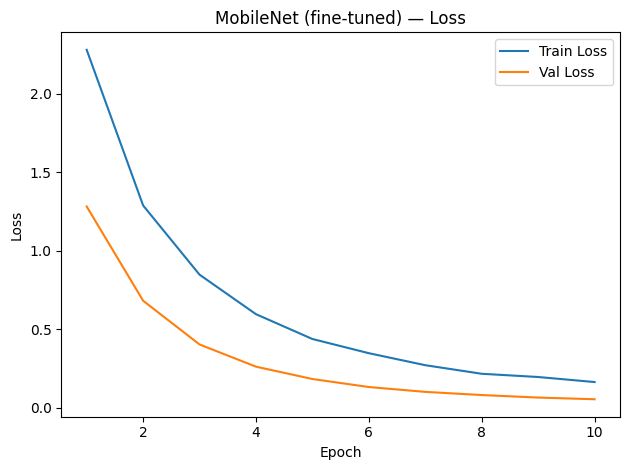

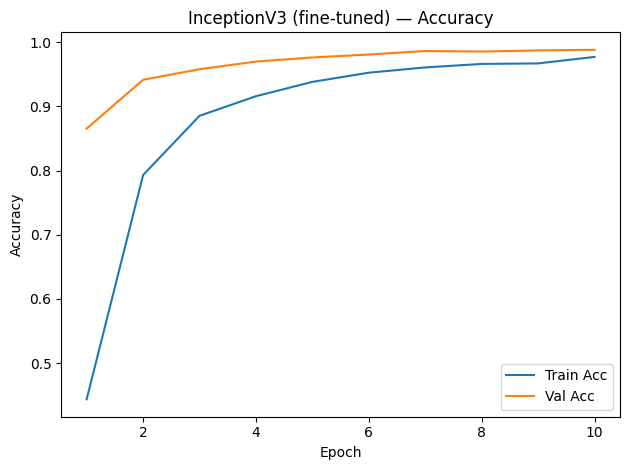

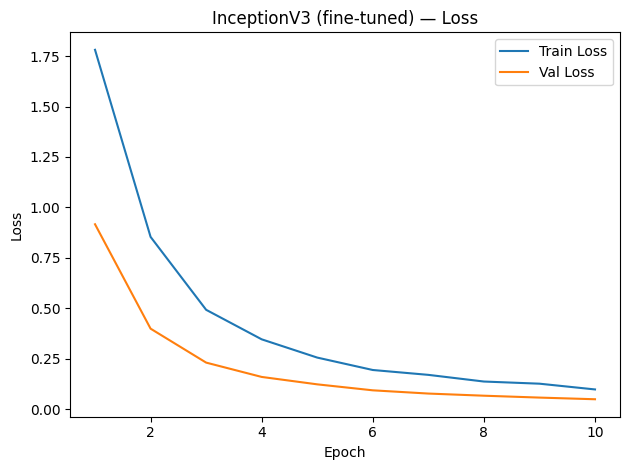

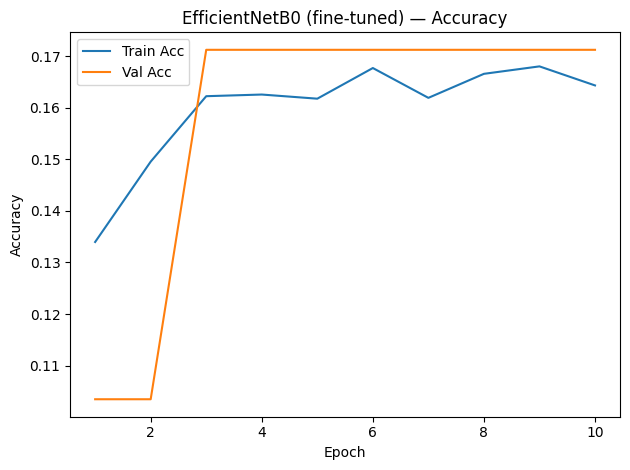

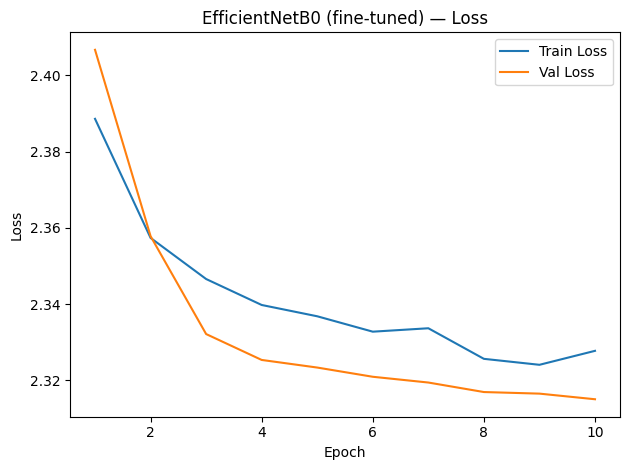

In [63]:
# Iterate through each model
for title, h in histories:
    acc     = _get(h, "accuracy", "acc")
    val_acc = _get(h, "val_accuracy", "val_acc")
    loss    = h.history.get("loss")
    val_loss= h.history.get("val_loss")
    epochs  = range(1, len(loss)+1) if loss else range(1, len(acc)+1)

    # Plot Accuracy
    plt.figure()
    if acc:     plt.plot(epochs, acc, label="Train Acc")
    if val_acc: plt.plot(epochs, val_acc, label="Val Acc")
    plt.title(f"{title} — Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Loss
    plt.figure()
    if loss:     plt.plot(epochs, loss, label="Train Loss")
    if val_loss: plt.plot(epochs, val_loss, label="Val Loss")
    plt.title(f"{title} — Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()